## Deeplearning network 
### individuare la legge di correlazione fra due dati

il presente si propone l' esercizio di :

1. creare il dataset in excel di

    500 triple
    
    --> x1 e x2 e y tali che EQ.A= " 3*x1 +2*x2 = y " 
    
     --> x1 e x2 e y tali che EQ.B=" 5*x1 +3*x2 = y "
    
    
2. creare il dataset in excel di z che sia 0 se EQ.A e 1 se EQ.B


3. esportare il dataset sottoforma di files .CSV
    train.CSV
    test.CSV
    validate.CSV


4. dividere il dataset in "train_data" e "train_solution" ,
                           "test_data" e "test_solution" , 
                           "validate_data" e "validate_solution"

    

In [50]:
# 1. e 2. creato il file dataset.xlsx che contiene nello sheet "dataset" i 500 punti

# 3.
import numpy as np
import pandas as pd
data_xls = pd.read_excel('dataset.xlsx', 'dataset_tot', index_col=None) # pandas legge il file excel
data_xls.to_csv('dataset.csv', encoding='utf-8',index=False)  # salva il file in .csv

# NOTA : se index=True viene automaticamente aggiunta una colonna (la prima) contenente 
#        un indice progressivo crescente


In [130]:
# visualizziamo i primi 20 punti

# Reading the csv file into a pandas DataFrame
data_glob = pd.read_csv('dataset.csv')  # creato il DataFrame "data_glob"

# Printing out the first 10 rows of our data
data_glob[:10]


,x1,x2,y,z
0,2,46,148,1
1,13,14,67,0
2,84,73,398,0
3,-36,-86,-280,0
4,-59,62,-109,1
5,45,86,483,1
6,-66,20,-270,1
7,-53,9,-238,1
8,-83,56,-247,1
9,42,57,240,0


In [182]:
mean_=np.array([])
std_=np.array([])
for s in ['x1','x2','y']:
    mean,std=np.array([data_glob[s].mean()]),np.array([data_glob[s].std()])
    data_glob.loc[:,s]=(data_glob[s]-mean)/std
    mean_=np.append([mean_],[mean])
    std_=np.append([std_],[std])
print (mean_,std_)

[-5.77315973e-18 -8.43769499e-18  1.19904087e-17] [1. 1. 1.]


In [183]:
# Printing out the first 10 rows of our data
data_glob[:10]

,x1,x2,y,z
0,0.117708,0.862550,0.641632,1
1,0.306397,0.298192,0.345102,0
2,1.524301,1.338726,1.556847,0
3,-0.534128,-1.465425,-0.925217,0
4,-0.928660,1.144728,-0.299210,1
5,0.855311,1.567997,1.868021,1
6,-1.048735,0.404009,-0.888608,1
7,-0.825739,0.210012,-0.771461,1
8,-1.340346,1.038911,-0.804409,1
9,0.803851,1.056548,0.978431,0


# PANDAS

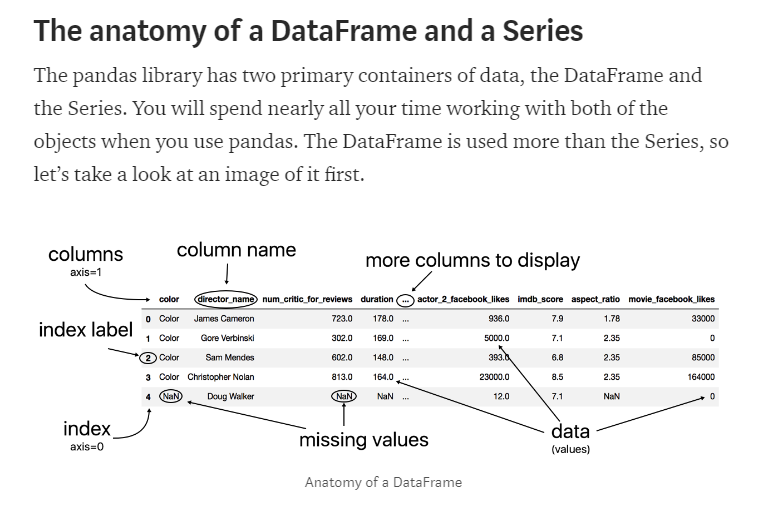

link:

https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c

Pandas methods links:

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pop.html





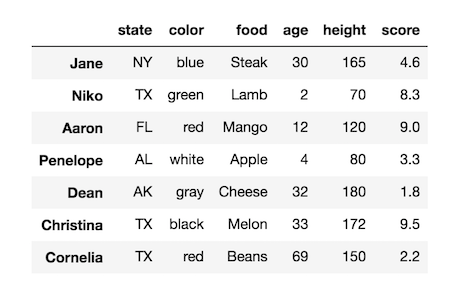



## Pandas.DataFrame[]   method for subset 

Used to select a subset of columns ONLY

df[[column_selection1,column_selection2]]

## Pandas.DataFrame.loc[]   method for subset 

Unlike just the indexing operator, it is possible to select rows and columns simultaneously with .loc. You do it by separating your row and column selections by a comma. It will look something like this:

 df.loc[row_selection, column_selection]
 
 ## Pandas.DataFrame.iloc[]   method for subset 
 
 The .iloc indexer is very similar to .loc but only uses integer locations to make its selections. The word .iloc itself stands for integer location so that should help with remember what it does.
 
 df.iloc[[raw_index1,raw_index2], [col_index1,col_index2]]

# NUMPY

the random.choice method generates a random sample from a given 1-D array,

- numpy.random.choice($a$, $size$=None, $replace$=True, $p$=None)

Parameters:

$a$ : 1-D array-like or int

If an ndarray, a random sample is generated from its elements. If an int, the random sample is generated as if a were np.arange(a)

$size$ : int or tuple of ints, optional

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.

$replace$ : boolean, optional

Whether the sample is with or without replacement

$p$ : 1-D array-like, optional

The probabilities associated with each entry in a. If not given the sample assumes a uniform distribution over all entries in a.

Numpy links:

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html

# split dataframe using sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [184]:
# 4. 

rows=len(data_glob.index)
columns=len(data_glob.columns)

train_part=0.9
test_part=0.5


from sklearn.model_selection import train_test_split

df_train,df_remain=train_test_split(data_glob,test_size=1-train_part,random_state=True)
df_test,df_validate=train_test_split(df_remain,test_size=1-test_part,random_state=True)

print ("The number of datas in the train set: ",df_train.size/columns)
print ("The number of datas in the test set: ",df_test.size/columns)
print ("The number of datas in the validation set: ",df_validate.size/columns)

The number of datas in the train set:  450.0
The number of datas in the test set:  25.0
The number of datas in the validation set:  25.0


In [185]:
# 4. bis  
input_features=columns-1

X_train=df_train.values[0:,0:input_features]
Y_train=df_train.values[:,input_features]

X_test=df_test.values[:,0:input_features]
Y_test=df_test.values[:,input_features]

X_validate=df_validate.values[:,0:input_features]
Y_validate=df_validate.values[:,input_features]

print("created data and solution for train set")
print("created data and solution for test set")
print("created data and solution for validate set")


created data and solution for train set
created data and solution for test set
created data and solution for validate set


   ## definiamo le funzioni base

In [186]:
# la rete avrà :
''' 1 layer
    n input (pari al numero di variabili indipendenti)
    m output (sempre 2 per la rete in esempio )'''
# date le dimensioni volute crea e inizializza una matrice dei pesi con media zero
# e deviazione standard 1\sqrt{n*m}

def weight_create(n,m):
    size=n*m
    weights = np.random.normal(loc=0.0,scale=1 / size**.5, size=(n,m))
    
    return (weights)

In [187]:
# create the matrix of Weights 

weights=weight_create(input_features,1)
print (weights)

[[-0.57239754]
 [-0.6330423 ]
 [-0.38768107]]


In [188]:
def sigmoid(x):
    h=1/(1+np.exp(-x))
    return h

In [189]:
def sigmoid_prime(x):
    h=sigmoid(x)*(1-sigmoid(x))
    return h

In [201]:
def train(input_data,true_output,weights):
    
    epochs= 10 # definiamo il numero di epoche
    learn_rate=0.01 # definiamo la learning rate
    
    for e in range(epochs):
        del_w = np.zeros(weights.shape)   # inizializzo a una matrice di zeri la variazione alla matrice weights
        print (del_w)                                 # poiche ogni epoca ho finito il calcolo di quanto deve variare 
        for x,y in zip(input_data,true_output):
            #print (x)
            #print (y.dtype)
            h=np.dot(x,weights)
            #print (h)
            y_hat=sigmoid(h)
            #print (h)
            error_i=(y-y_hat)
            error_term=error_i*sigmoid_prime(h)
            del_w=+error_term*x[:,None]
            
            #print (del_w)
            
        weights_=weights+del_w*learn_rate/(df_train.size/columns)
        print (weights_)
        #print (Error)
    return (None)
            
    

In [202]:
weights_=train(X_train,Y_train,weights)
print (weights_)

[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
[[0.]
 [0.]
 [0.]]
[[-0.57239222]
 [-0.63304468]
 [-0.38767874]]
None


In [203]:
def predict(x1,x2,y):
    weights_trained=weights_
    x=np.array([x1,x2,y])
    #print (mean_)
    x_=(x-mean_)/std_
    print (x_)
    h=np.dot(x_,weights)
    print (h)
    y_hat=sigmoid(h)
    return (y_hat)

In [204]:
#print(X_train.dtype)
print (mean_)
predict(2,46,148)
#print (weights_)

[-5.77315973e-18 -8.43769499e-18  1.19904087e-17]
[  2.  46. 148.]
[-87.64153972]


array([8.66488721e-39])

In [205]:
print (weights)

[[-0.57239754]
 [-0.6330423 ]
 [-0.38768107]]
